In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
pd.set_option('display.max_columns',None)
# pd.set_option('display.max_rows',None)

In [2]:
df= pd.read_csv('loan_approval_data.csv')
df.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [3]:
df.shape

(614, 13)

In [4]:
df.isna().sum()

Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

In [13]:
df.describe()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
count,614.000000,614.000000,592.000000,600.00000,564.000000
mean,5403.459283,1621.245798,146.412162,342.00000,0.842199
std,6109.041673,2926.248369,85.587325,65.12041,0.364878
min,150.000000,0.000000,9.000000,12.00000,0.000000
25%,2877.500000,0.000000,100.000000,360.00000,1.000000
50%,3812.500000,1188.500000,128.000000,360.00000,1.000000
75%,5795.000000,2297.250000,168.000000,360.00000,1.000000
max,81000.000000,41667.000000,700.000000,480.00000,1.000000


In [5]:
df.dtypes

Loan_ID               object
Gender                object
Married               object
Dependents            object
Education             object
Self_Employed         object
ApplicantIncome        int64
CoapplicantIncome    float64
LoanAmount           float64
Loan_Amount_Term     float64
Credit_History       float64
Property_Area         object
Loan_Status           object
dtype: object

In [6]:
# how na is in data_column

df[df['LoanAmount'].isna()].head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
35,LP001106,Male,Yes,0,Graduate,No,2275,2067.0,NaN,360.0,1.0,Urban,Y
63,LP001213,Male,Yes,1,Graduate,No,4945,0.0,NaN,360.0,0.0,Rural,N
81,LP001266,Male,Yes,1,Graduate,Yes,2395,0.0,NaN,360.0,1.0,Semiurban,Y
95,LP001326,Male,No,0,Graduate,NaN,6782,0.0,NaN,360.0,NaN,Urban,N


In [7]:
# dropping hte missing values
df=df.dropna()
df.isna().sum()

Loan_ID              0
Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
Loan_Status          0
dtype: int64

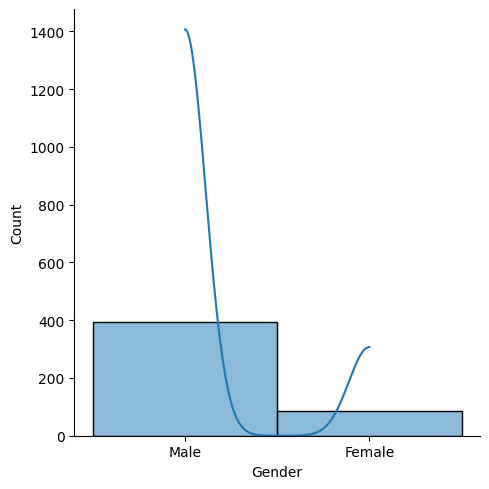

In [8]:
ax=sns.displot(data=df, x="Gender", kde=True,)

<AxesSubplot: xlabel='Loan_Status', ylabel='ApplicantIncome'>

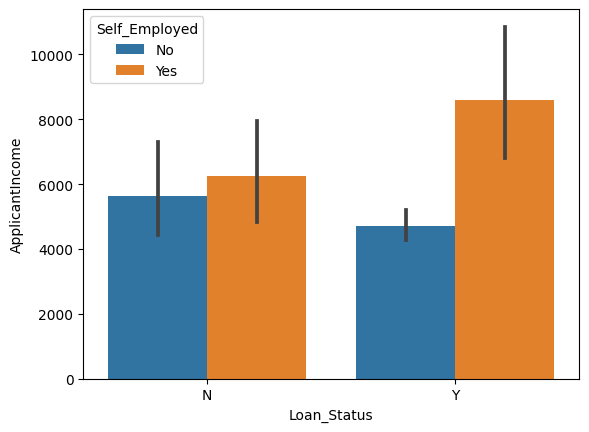

In [9]:
sns.barplot(x='Loan_Status', y='ApplicantIncome', data=df,hue='Self_Employed')

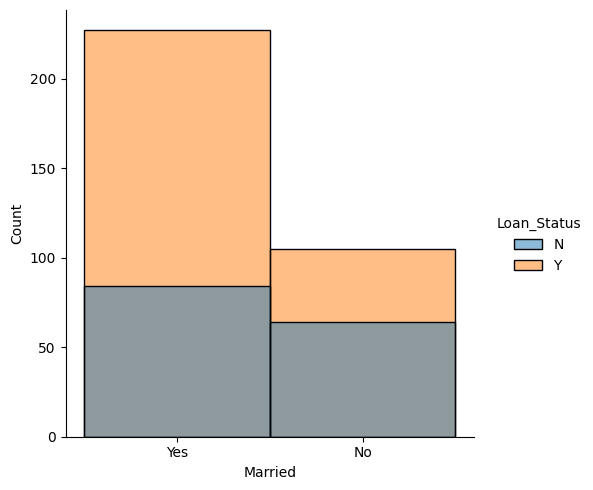

In [10]:
ax=sns.displot(data=df, x="Married",hue="Loan_Status")

<AxesSubplot: xlabel='Property_Area', ylabel='ApplicantIncome'>

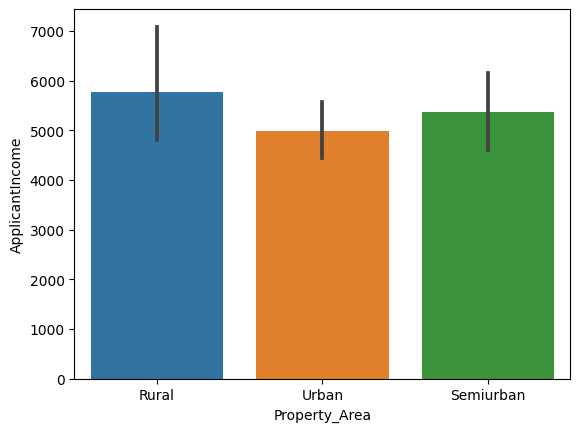

In [11]:
sns.barplot(x='Property_Area',y='ApplicantIncome',data=df)

### Label Encoding

In [12]:
print(df['Property_Area'].unique(),df['Loan_Status'].unique())

['Rural' 'Urban' 'Semiurban'] ['N' 'Y']


In [13]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()

In [14]:
df['Property_Area'] = le.fit_transform(df['Property_Area'])
df['Loan_Status']= le.fit_transform(df['Loan_Status'])
df['Self_Employed']= le.fit_transform(df['Self_Employed'])
df['Married']= le.fit_transform(df['Married'])
df['Education']= le.fit_transform(df['Education'])
df['Gender']= le.fit_transform(df['Gender'])


df.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
1,LP001003,1,1,1,0,0,4583,1508.0,128.0,360.0,1.0,0,0
2,LP001005,1,1,0,0,1,3000,0.0,66.0,360.0,1.0,2,1
3,LP001006,1,1,0,1,0,2583,2358.0,120.0,360.0,1.0,2,1
4,LP001008,1,0,0,0,0,6000,0.0,141.0,360.0,1.0,2,1
5,LP001011,1,1,2,0,1,5417,4196.0,267.0,360.0,1.0,2,1


In [15]:
# i was thinking to drop this feature ,but id does affect the loan_status
print(df['Loan_Amount_Term'].unique())

[360. 120. 180.  60. 300. 480. 240.  36.  84.]


#### Managing the Dependents column values

In [16]:
df['Dependents'].value_counts()

0     274
2      85
1      80
3+     41
Name: Dependents, dtype: int64

In [17]:
# replacing 3+ to 4
df=df.replace(to_replace='3+',value=4)
df['Dependents'].value_counts()

0    274
2     85
1     80
4     41
Name: Dependents, dtype: int64

<AxesSubplot: xlabel='Education', ylabel='count'>

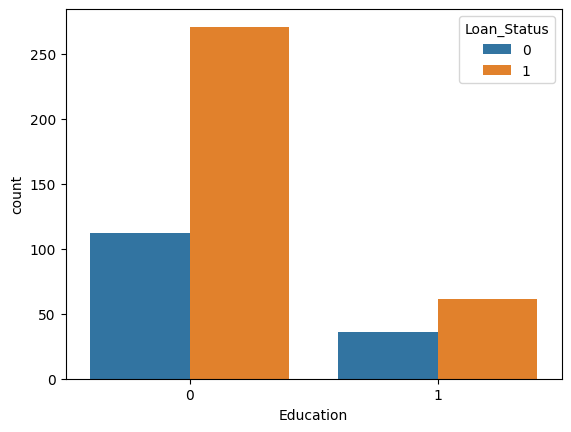

In [19]:
sns.countplot(x='Education',hue='Loan_Status',data=df)

### Test Train Split


In [20]:
X=df.drop(['Loan_Status','Loan_ID'],axis=1)
y=df['Loan_Status']

In [21]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y, test_size=0.1, random_state=1)


In [22]:
print(X_train.shape,X_test.shape)

(432, 11) (48, 11)


### Training the Model

In [23]:
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier

In [24]:
# cross validation score
from sklearn.model_selection import cross_val_score

In [25]:
svc_score= cross_val_score(SVC(), X_train, y_train,cv=10)
print("Average accuracy:", svc_score)

Average accuracy: [0.70454545 0.68181818 0.69767442 0.69767442 0.69767442 0.72093023
 0.69767442 0.69767442 0.69767442 0.69767442]


In [26]:
rand_forest_score= cross_val_score(RandomForestClassifier(), X_train, y_train,cv=10)
print("Average accuracy:", rand_forest_score)

Average accuracy: [0.65909091 0.84090909 0.8372093  0.79069767 0.76744186 0.8372093
 0.76744186 0.79069767 0.8372093  0.79069767]


In [34]:
model = SVC(kernel='linear')
model.fit(X_train, y_train)

SVC(kernel='linear')

In [35]:
from sklearn.metrics import accuracy_score

y_pred= model.predict(X_test)

In [37]:
accuracy_match =accuracy_score(y_pred,y_test)
accuracy_match

0.6875

#### Confusion Matrix 

In [43]:
# Create a confusion matrix for the predicted labels and true labels

from sklearn.metrics import confusion_matrix

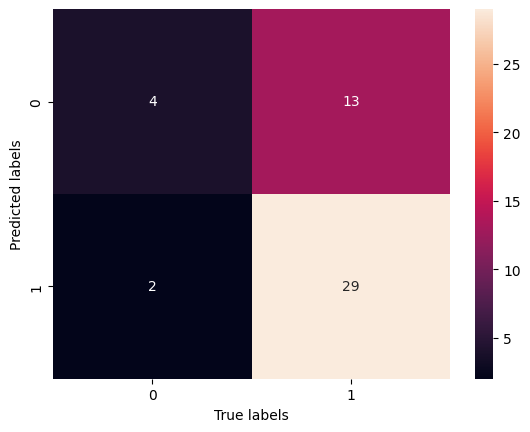

In [45]:
cm = confusion_matrix(y_test, y_pred)

# Create a heatmap of the confusion matrix
sns.heatmap(cm, annot=True, fmt="d")
plt.ylabel('Predicted labels')
plt.xlabel('True labels')
plt.show()